# Introduction and Background 

- A12833641
- A92137507
- A12818326
- A13128166


The more geographical modifications and deteriorations on roads will have an increase on the amount of traffic. We predict this based on inferential statistics drawn from data using Kaggle. Also, the amount of potholes is determined by the possibility that people slow down when seeing and noticing these potholes. We are using our data to predict traffic speeds and also whether or not pot holes slow down traffic.  

This is a question of interest because we spend numerous driving in our daily lives. Everyone knows peak traffic times, yet we have no choice to drive through it to get to our destinations. It is necessary to identify solutions to traffic, because then time can be spent elsewhere other than commuting from location to location. 

This question came into our hypothesis and thoughts because we thought about traffic around UCSD when driving to school and during heavy traffic hours. One example of this is during heavy traffic hours at 4-6:30 pm on Genesee Ave trying to get out of Regents Road to head home. People tend to go toward the 5 interstate to head south. Therefore, there is a lot of traffic and heavy construction on Genesee Ave and also there are only two open lanes which clogs up traffic and creates traffic for about 4-5 miles as an estimate. From this inference, we would like to evaluate road conditions to determine whether street construction and conditions affect the flow of traffic because of driver’s awareness.  

Road conditions such as potholes or street constructions that include adding more lanes or obstructions to the road have been found to slow down traffic. This occurred to us when we tried driving in traffic hours and have been delayed ~30 mins because of these obstructions. We’ve decided to divulge and dig deeper into our studies of these road obstructions to see how much of a difference these obstructions cause. They are chaotic in a sense however, they become the main point of focus for drivers in the future because these constructions can lead to more safety driving and more sustainable roads.  


References (include links):
1) http://journals.sagepub.com/doi/full/10.1177/1687814015618176
2)http://www.sandiegouniontribune.com/topic/disasters-accidents/transportation-disasters-accidents/traffic-accidents/03010001-topic.html
Our project will consist of studying the flow of traffic due to traffic construction over time and the comparison of different data from different years. Our independent variable will be the amount of traffic obstructions such as potholes, constructions, and interferences that might draw the attention of drivers away from actual driving. Comparisons of the same intersections over the span of several years will give us the necessary information needed to make a correct and consistent inference. Our results for this project will tell us that traffic obstructions do make a difference in the flow of traffic in creating hazards on the roads. This type of hazard can lead to many accidents that are unnecessary and also from personal experience, the traffic may cause very unhappy drivers. 
	If our hypotheses and analyses are correct, the contribution to the project topic will be that it proves we need to find a more safe and sustainable way to expand roads and have a better way to lower car troubles. If our methods don’t work and our hypothesis isn’t true to the hypothesis or the null hypothesis is true, then it proves that the way that traffic is means it is alright and doesn’t have any problems and we should keep the system. Potential confounds to our data is the type of construction that occurs or if traffic flows at normal rates even with these obstructions. 



# Dataframe Links

One of the dataframes was too large to upload (df_traffic), and instead we will include it in this cell.

CSV df_traffic: https://data.lacounty.gov/api/views/uvew-g569/rows.csv?accessType=DOWNLOAD

Link df_traffic: https://data.lacounty.gov/Transportation/Traffic-Count-Data/uvew-g569

We will also include the other dataframe for completion.

CSV df_roadconditions: https://data.lacity.org/api/views/yjxu-2kqq/rows.csv?accessType=DOWNLOAD


Link df_roadconditions: https://data.lacity.org/A-Livable-and-Sustainable-City/Road-Surface-Condition-Map/d9rz-k88a/data

# Imports 

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import seaborn as sns
import statsmodels.api as sm

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Wrangling

In [2]:
# Load dataframe containing road conditions 

df_roadconditions = pd.read_csv('road_conditions.csv')

In [3]:
df_roadconditions.head()

,PCI,STATUS,the_geom,ST_NAME
0,63,Fair,MULTILINESTRING ((-118.25407678912832 33.94611...,100TH ST
1,100,Good,MULTILINESTRING ((-118.2491085817743 33.946114...,100TH ST
2,16,Poor,MULTILINESTRING ((-118.23675014696774 33.94490...,101ST ST
3,16,Poor,MULTILINESTRING ((-118.28261188476995 33.94462...,101ST ST
4,27,Poor,MULTILINESTRING ((-118.28693908734667 33.94460...,101ST ST


In [4]:
df_roadconditions.drop('the_geom', axis=1, inplace=True)
df_roadconditions.columns = ['PCI', 'STATUS','ST_NAME']

In [5]:
df_roadconditions.head()

,PCI,STATUS,ST_NAME
0,63,Fair,100TH ST
1,100,Good,100TH ST
2,16,Poor,101ST ST
3,16,Poor,101ST ST
4,27,Poor,101ST ST


In [6]:
# Load dataframe containing traffic counts 

df_traffic = pd.read_csv('traffic_conditions.csv')

In [7]:
df_traffic.head()

,Location,Count Date,Day,24 Hr. Total Vol.
0,104TH STREET W/O BUDLONG AVENUE,10/12/2012 12:00:00 AM,Fri,136
1,104TH STREET W/O BUDLONG AVENUE,10/11/2012 12:00:00 AM,Thur,764
2,104TH STREET W/O BUDLONG AVENUE,10/10/2012 12:00:00 AM,Wed,833
3,104TH STREET W/O BUDLONG AVENUE,03/02/2008 12:00:00 AM,Sun,844
4,104TH STREET W/O BUDLONG AVENUE,03/01/2008 12:00:00 AM,Sat,907


In [8]:
# Drop unnecessary columns 

df_traffic.drop(['Count Date', 'Day'], axis=1, inplace=True)

In [9]:
df_traffic.columns = ['ST_NAME', 'TRAFFIC']

In [10]:
df_traffic.head()

,ST_NAME,TRAFFIC
0,104TH STREET W/O BUDLONG AVENUE,136
1,104TH STREET W/O BUDLONG AVENUE,764
2,104TH STREET W/O BUDLONG AVENUE,833
3,104TH STREET W/O BUDLONG AVENUE,844
4,104TH STREET W/O BUDLONG AVENUE,907


# Data Cleaning

In [11]:
# Check for missing data values 

n_nanR = sum(np.isnan(df_roadconditions['PCI']))
n_nanT = sum(np.isnan(df_traffic['TRAFFIC']))

print(n_nanR, n_nanT)

0 0


In [12]:
# Since there are no missing values, there is no need to drop any rows

In [13]:
df_roadconditions = df_roadconditions.groupby('ST_NAME', as_index=False)[['PCI']].mean()

In [14]:
df_roadconditions.head()

,ST_NAME,PCI
0,100TH ST,81.500000
1,101ST ST,67.368421
2,102ND ST,65.884615
3,103RD PL,65.333333
4,103RD ST,71.340000


In [15]:
# Method to standardize street names to set them equal to each other in the two dataframes. 

def standardize_street(string):
    
    if string.find("STREET") != -1:
        output = string.partition(' ')
        output = list(output)
        output[0] = output[0] + " ST"
    elif string.find("AVENUE") != -1:
        output = string.partition(' ')
        output = list(output)
        output[0] = output[0] + " AVE"
    elif string.find("BOULEVARD") != -1:
        output = string.partition(' ')
        output = list(output)
        output[0] = output[0] + " BLVD"
    elif string.find("PLACE") != 1:
        output = string.partition(' ')
        output = list(output)
        output[0] = output[0] + " PL"
    elif string.find("DRIVE") != 1:
        output = string.partition(' ')
        output = list(output)
        output[0] = output[0] + " DR"
    else: 
        output[0] = string
        
    return output[0]

In [16]:
df_traffic['ST_NAME'] = df_traffic['ST_NAME'].apply(standardize_street)

In [17]:
# View new standardized street names. 
df_traffic.head()

,ST_NAME,TRAFFIC
0,104TH ST,136
1,104TH ST,764
2,104TH ST,833
3,104TH ST,844
4,104TH ST,907


In [18]:
df_traffic = df_traffic.groupby('ST_NAME', as_index=False)[['TRAFFIC']].mean()

In [19]:
df_traffic.head()

,ST_NAME,TRAFFIC
0,100TH ST,79.000000
1,101ST ST,408.714286
2,102ND ST,669.666667
3,103RD ST,5463.142857
4,104TH ST,2197.000000


In [20]:
#df_roadconditions[df_roadconditions.ST_NAME.isin(df_traffic.ST_NAME)].reset_index()

df_combined = pd.merge(df_roadconditions, df_traffic, on='ST_NAME')
df_combined.PCI = df_combined.PCI.astype(int)
df_combined.TRAFFIC = df_combined.TRAFFIC.astype(int)
df_combined.head()

,ST_NAME,PCI,TRAFFIC
0,100TH ST,81,79
1,101ST ST,67,408
2,102ND ST,65,669
3,103RD ST,71,5463
4,104TH ST,78,2197


# Visualizing Data

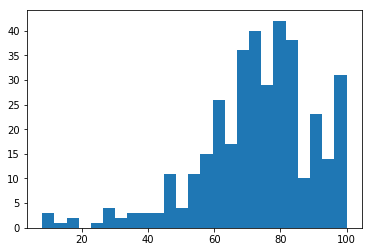

In [21]:
# Histogram of the PCI

_ = plt.hist(df_combined['PCI'], 25)
f1 = plt.gcf()

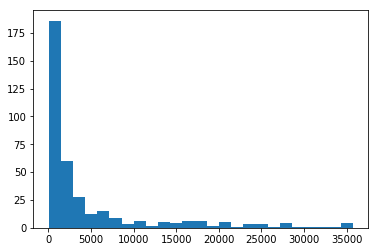

In [22]:
# Histogram of the Traffic

_2 = plt.hist(df_combined['TRAFFIC'], 25)
f1 = plt.gcf()

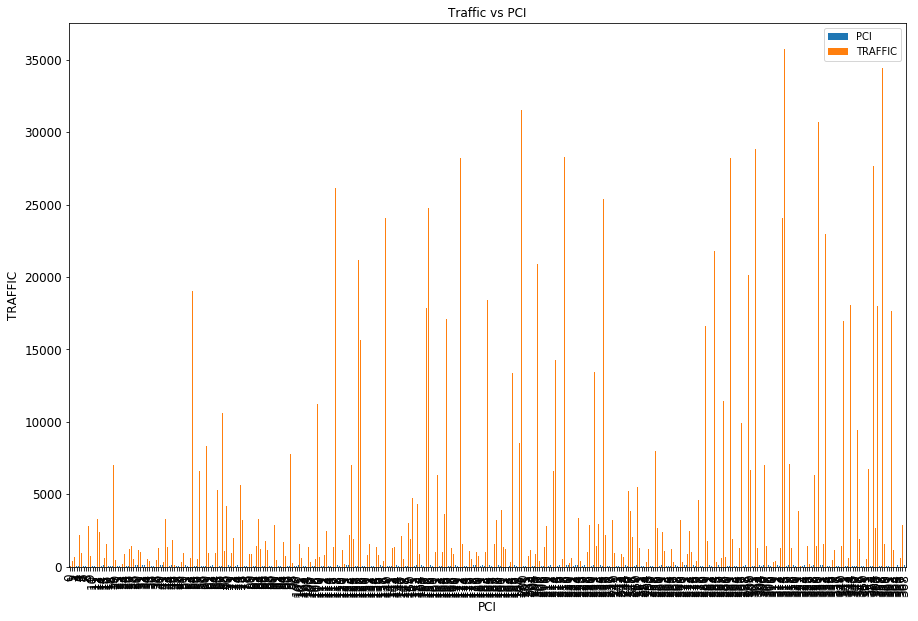

In [23]:
# Bar Graph of Traffic vs PCI

ax = df_combined[['PCI','TRAFFIC']].plot(kind='bar', title ="Traffic vs PCI", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("PCI", fontsize=12)
ax.set_ylabel("TRAFFIC", fontsize=12)
plt.show()

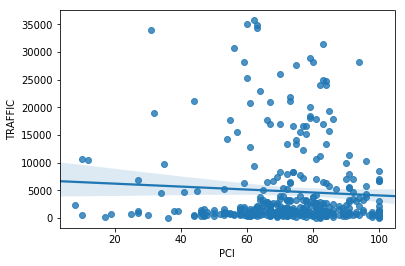

In [24]:
# Seaborn plot

sns.regplot(x = 'PCI', y = 'TRAFFIC', data=df_combined)

# Data Analysis

In [25]:
# Correlation calculation

df_combined[['PCI', 'TRAFFIC']].corr()

,PCI,TRAFFIC
PCI,1.000000,-0.062727
TRAFFIC,-0.062727,1.000000


We gather the correlation coefficient and find that it is equal to -0.062727. The negative sign corresponds to the fact that the two variables move into the opposite directions, meaning that it is common for the two variables PCI and TRAFFIC to be inverse to each other (as in if one is high in value, the other is low). Because the value is so low and not equal to 1 or -1, there is no clear linear relation between the two variables. However, this could mean that there is a non-linear relation. 

In [26]:
# OLS on PCI and traffic 

outcome, predictors = patsy.dmatrices('PCI ~ TRAFFIC', df_combined)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    PCI   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.450
Date:                Thu, 22 Mar 2018   Prob (F-statistic):              0.229
Time:                        23:30:30   Log-Likelihood:                -1578.4
No. Observations:                 369   AIC:                             3161.
Df Residuals:                     367   BIC:                             3169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.7584      1.084     68.024      0.0

We created an OLS linear model to confirm our belief that there may not be a linear correlation. The R-squared value is 0.004, a very small number that determines this may not be the best model to use to analyze the data. The P>|t| value is 0.229, which is less than 1. This also supports that traffic does not significantly predict the road conditions. 

Our null hypothesis for our data was that things should stay the way they are right now and geographical modifications and deteriorations on roads have no effect on why there is so much traffic and thus, there is something else that causes an increase in traffic such as overpopulation of cars or slow drivers. 

Our alternative hypothesis is that geographical modifications and deteriorations do have an effect on the increase in traffic.

The data we found was based on three criterias. The first criteria was the description of the street name, the road condition and the 24 hour volume of the road - which basically means how many drivers are on this road on a 24 hour turnaround. We used data wrangling to determine the status of the road on a scale ranging from good, fair, and poor. We checked our data for missing values and determined there were no missing values so there was no need to drop rows. We rated the road conditions with the value "PCI" which means *the higher PCI is the better road conditions are.* We plotted these points on a graph and determined from our data that the amount of PCI and traffic does vary based on the amount of geographical modifications and deteriorations because of confounds such as populated areas and more people driving on roads. More populated areas results in a higher amount of PCI and a higher amount of traffic whereas a less populated will have less PCI and a lower amount of traffic. That means areas with lower traffic will have more deterioration because it isn't as maintained as high volume traffic areas. However, from our data, we also see an influx in the amount of traffic based on the PCI in the more extreme side of our graph. It shows that we retain our null hypothesis because geographical modifications and deteriorations occur LESS on roads with high volumes of traffic. We can conclude that the government actually takes the time to maintain these roads because of the high volume of traffic in order to maintain safety for drivers in traffic situations. Thus, the traffic is due to another confound that we didn't analyzed such as high population in Los Angeles County or something else. 

# Privacy and Ethics Considerations

The data is available on the the City of Los Angeles’ public website and, thus, is available for use.
There appear to be no privacy concerns regarding the datasets. However, there are terms of use that our group must comply with. Accordingly, we must be wary that we do not crawl at a disruptive rate. 
There is a potential bias in the dataset as to what locations are recorded. For instance, it is not specified on any descriptions of the dataset as to whether certain areas were excluded from the data, perhaps for sociopolitical reasons or lack of technology in certain areas. However, because traffic data is pulled from traffic sensors, all relevant stakeholders that affect traffic (i.e. citizens who drive cars) are included.
Because it is government information of the city of LA, all of the information is collected by the government from the people. Data is presumably pulled from traffic sensors and is, thus, noninvasive. People who are driving in pubic are presumed to be wary of their activity in public and do not necessarily wish to keep things private. However, implementation of data gathering can differ city by city and if, for example, data were to be pulled via smartphone then, perhaps, citizens would feel concerned about privacy. Regardless, data collected is measured in frequency and counts in terms of traffic and does not specify who, making privacy less of an issue. Furthermore, this could raise potential questions on equitable impact. However, because traffic data is pulled from traffic sensors, all the relevant aforementioned stakeholders that affect traffic (i.e. citizens who drive cars) should be included.


# Conclusions and Discussion

Based on our data, we concluded to retain the null hypothesis. There does not appear to be any type of clear correlation between the two variables PCI and TRAFFIC. Despite this, however, we found that there is a strong grouping of an inverse relationship (as seen in the -0.062727 correlation coefficient and in the Seaborn graph). However, because there is no clear correlation we cannot conclude that road conditions affect traffic.

For the future, it would be worth noticing the negative correlation and how it may potentially have a correlation in a different type of dataset, i.e a different city or region. It would also be interesting to support this project in the future with certain dates or times. 

# Contributions

Austin and John worked on the Data Wrangling and Data Cleaning sections, while Henry and Ryan worked on the Data Visualization and Data Analysis sections. 

However in general we all contributed to this project equally and helped each other on parts that were complicated. We lifted each other's weaknesses and helped each other while applying the strengths we had to the project. Overall, this project helped us understand data science on another level and we helped each other understand any confusing parts.